# 6. 數據可視化

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from pandas import Series, DataFrame

## 6.1 matplotlib 的子庫

In [3]:
import pkgutil as pu
import pydoc

def clean(astr):
    s = astr
    # remove multiple spaces
    s = ' '.join(s.split())
    s = s.replace('=','')
    return s

def print_desc(prefix, pkg_path):
    for pkg in pu.iter_modules(path=pkg_path): # iterate 每一個 modules
        name = prefix + "." + pkg[1]
        
        if pkg[2] == True:
            try:
                docstr = pydoc.plain(pydoc.render_doc(name))  # 取出每個 module 的 DocString
                docstr = clean(docstr)
                start = docstr.find("DESCRIPTION")
                docstr = docstr[start: start + 140]
                print(name, docstr)
            except:
                continue

print("matplotlib version", matplotlib.__version__)
print_desc("matplotlib", matplotlib.__path__)

matplotlib version 2.0.0
matplotlib.axes 
matplotlib.backends 
matplotlib.compat 


D:\Python\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The matplotlib.delaunay module was deprecated in version 1.4. Use matplotlib.tri.Triangulation instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


matplotlib.delaunay DESCRIPTION :Author: Robert Kern <robert.kern@gmail.com> :Copyright: Copyright 2005 Robert Kern. :License: BSD-style license. See LICENSE.tx
matplotlib.projections 
matplotlib.sphinxext 
matplotlib.style 
matplotlib.testing 
matplotlib.tri 


## 6.2 matplotlib 繪圖入門

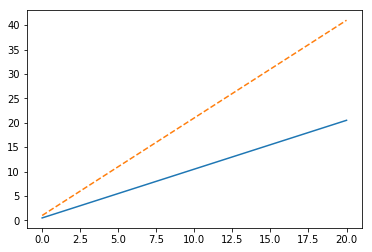

In [4]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 20)

plt.plot(x,  .5 + x)
plt.plot(x, 1 + 2 * x, '--')
plt.show()

## 6.4 散點圖

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)
df.tail()

,trans_count
year,
2010,1.511667e+09
2011,1.733500e+09
2012,2.014826e+09
2013,5.000000e+09
2014,4.310000e+09


In [6]:
years = df.index.values
counts = df['trans_count'].values
poly = np.polyfit(years, np.log(counts), deg=1)  # 用 polyfit 來擬合 a * years + np.log(counts) * 1 = 0
print("Poly", poly)

Poly [  3.61559210e-01  -7.05783195e+02]


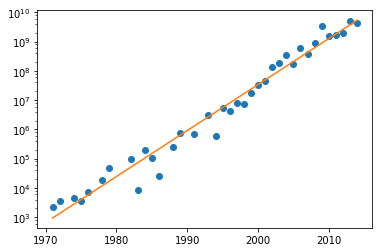

In [7]:
plt.semilogy(years, counts, 'o')  # 用 semilogy 來繪製

# 用 np.polyval(poly, years) 求出 poly(years) 的值
# 用 exp() 將 np.polyval(poly, years) 還原為原來的尺度
plt.semilogy(years, np.exp(np.polyval(poly, years)))  
plt.show()

## 6.3 對數圖

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('transcount.csv')
df.tail()

,trans_count,year
76,785000,2012
77,5000000000,2009
78,8500,1983
79,5000000000,2013
80,8500,1976


In [9]:
df = df.groupby('year').aggregate(np.mean)
df.tail()

,trans_count
year,
2010,1.511667e+09
2011,1.733500e+09
2012,2.014826e+09
2013,5.000000e+09
2014,4.310000e+09


In [10]:
gpu = pd.read_csv('gpu_transcount.csv')
gpu.tail()

,gpu_trans_count,year
26,3000000000,2010
27,3540000000,2012
28,4312711873,2011
29,7080000000,2012
30,6300000000,2013


In [11]:
gpu = gpu.groupby('year').aggregate(np.mean)
gpu.tail()

,gpu_trans_count
year,
2009,2154000000
2010,2946666666
2011,4312711873
2012,5310000000
2013,6300000000


In [12]:
df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
# df = df.replace(np.nan, 0)
df = df.fillna(0)
df.tail()
# print(df)

,trans_count,gpu_trans_count
year,,
2010,1.511667e+09,2.946667e+09
2011,1.733500e+09,4.312712e+09
2012,2.014826e+09,5.310000e+09
2013,5.000000e+09,6.300000e+09
2014,4.310000e+09,0.000000e+00


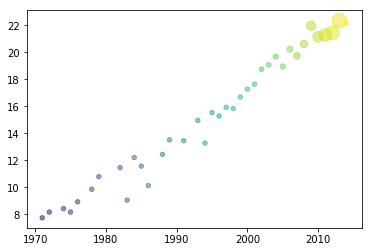

In [13]:
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values
cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5)
plt.show()

## 6.5 圖例和註解

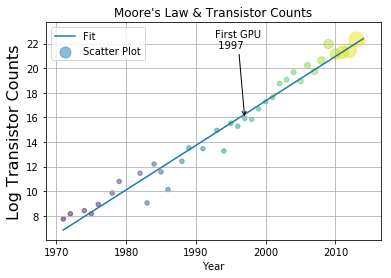

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
years = df.index.values
counts = df['trans_count'].values
gpu_counts = df['gpu_trans_count'].values

poly = np.polyfit(years, np.log(counts), deg=1)
plt.plot(years, np.polyval(poly, years), label='Fit')

# annotate
gpu_start = gpu.index.values.min()
y_ann = np.log(df.at[gpu_start, 'trans_count'])
ann_str = "First GPU\n %d" % gpu_start
plt.annotate(ann_str, xy=(gpu_start, y_ann), arrowprops=dict(arrowstyle="->"), xytext=(-30, +70), textcoords='offset points')  # annotate

# plot
cnt_log = np.log(counts)
plt.scatter(years, cnt_log, c= 200 * years, s=20 + 200 * gpu_counts/gpu_counts.max(), alpha=0.5, label="Scatter Plot")

# legend
plt.legend(loc='upper left')  

# grid and labels
plt.grid()
plt.xlabel("Year")
plt.ylabel("Log Transistor Counts", fontsize=16)
plt.title("Moore's Law & Transistor Counts")
plt.show()

## 6.6 三維圖

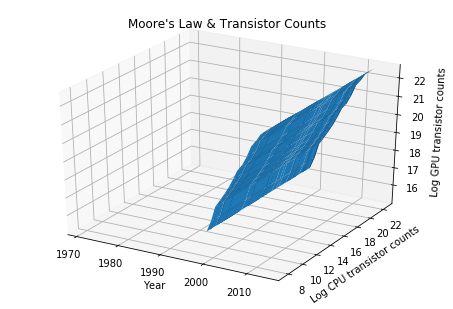

In [15]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)


fig = plt.figure()
ax = Axes3D(fig)

X = df.index.values
Y = np.log(df['trans_count'].values)
X, Y = np.meshgrid(X, Y)
Z = np.log(df['gpu_trans_count'].values)
ax.plot_surface(X, Y, Z)

ax.set_xlabel('Year')
ax.set_ylabel('Log CPU transistor counts')
ax.set_zlabel('Log GPU transistor counts')
ax.set_title("Moore's Law & Transistor Counts")
plt.show()

## 6.7 pandas 繪圖

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)

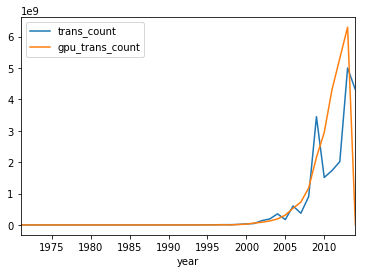

In [17]:
df.plot();

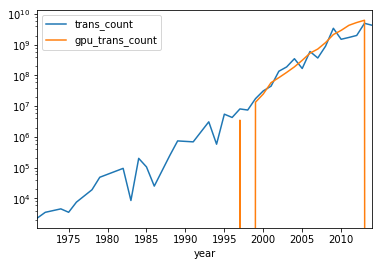

In [18]:
df.plot(logy=True);

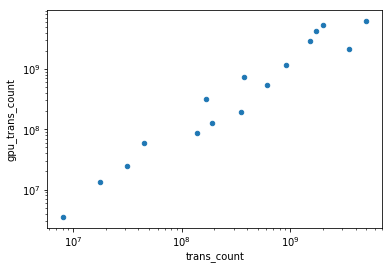

In [19]:
df[df['gpu_trans_count'] > 0].plot(kind='scatter', x='trans_count', y='gpu_trans_count', loglog=True);

## 6.9 自相關圖

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot


df = pd.read_csv('transcount.csv')
df = df.groupby('year').aggregate(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').aggregate(np.mean)

df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
df = df.replace(np.nan, 0)
df.tail()

,trans_count,gpu_trans_count
year,,
2010,1.511667e+09,2.946667e+09
2011,1.733500e+09,4.312712e+09
2012,2.014826e+09,5.310000e+09
2013,5.000000e+09,6.300000e+09
2014,4.310000e+09,0.000000e+00


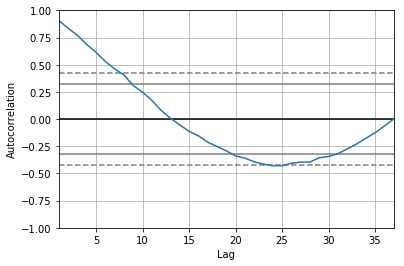

In [21]:
autocorrelation_plot(np.log(df['trans_count']));

# 時間延遲為 0 時， corelation = 1
# 時間延遲為 inf 時，corelation = 0

## 6.10 Plot.ly

In [22]:
# import plotly.plotly as py
# from plotly.graph_objs import *
# from getpass import getpass
# import numpy as np
# import pandas as pd

# df = pd.read_csv('transcount.csv')
# df = df.groupby('year').aggregate(np.mean)

# gpu = pd.read_csv('gpu_transcount.csv')
# gpu = gpu.groupby('year').aggregate(np.mean)

# df = pd.merge(df, gpu, how='outer', left_index=True, right_index=True)
# df = df.replace(np.nan, 0)

# api_key = getpass()

# # Change the user to your own username
# py.sign_in('LearningPythonDataAnalysis', api_key)

# counts = np.log(df['trans_count'].values)
# gpu_counts = np.log(df['gpu_trans_count'].values)

# data = Data([Box(y=counts), Box(y=gpu_counts)]) 
# plot_url = py.plot(data, filename='moore-law-scatter')
# print(plot_url)